In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

TOP_POSTER_LIMIT = 10
DOMAIN_LIMIT = 25
REPLIES_THRESHOLD = 150

df = pd.read_csv("data/latest-articles.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"], unit='s')
df["title"] = df["title"].astype("category")
df["posted_by"] = df["posted_by"].astype("category")
df["source_url"] = df["source_url"].astype("category")

In [2]:
# A thread is considered sourced if it has a URL link.
sourced = df[df.source_url != ""]

# This is not entirely accurate since some vanity posts have links.
vanity = df[df.source_url == ""]

In [3]:
def extract_domain(url) -> str:
    return (
        url.
            replace("www.","").
            replace("http://", "").
            replace("https://", "").
            split("/")[0]
    )


sourced.insert(len(sourced.columns)-1, "domain", (
    sourced.
        source_url.
        apply(extract_domain).
        astype("category")
))

<AxesSubplot:xlabel='count', ylabel='domain'>

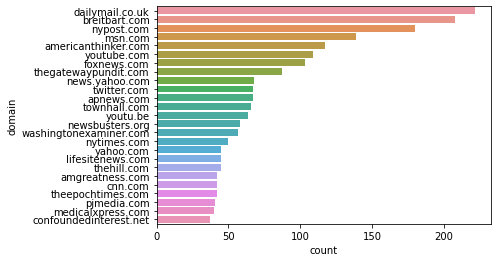

In [4]:
# Draws a chart that shows where discussion for a particular thread originated from.
data = sourced[["source_url", "domain"]].drop_duplicates()
top_sourced_domains = data.domain.value_counts().iloc[:DOMAIN_LIMIT].index
sns.countplot(
    y="domain",
    data=data,
    order=top_sourced_domains,
)

<AxesSubplot:xlabel='count', ylabel='posted_by'>

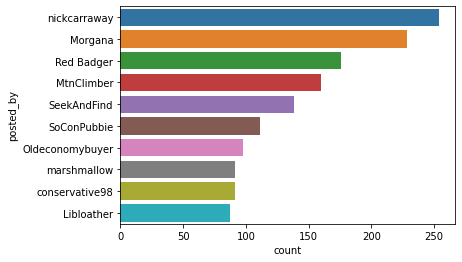

In [5]:
# Draws a chart that shows who posted a topic to be discussed that has a URL source.
data = sourced[["source_url", "posted_by"]].drop_duplicates()
top_sourced_posters = data.posted_by.value_counts().iloc[:TOP_POSTER_LIMIT].index
sns.countplot(
    y="posted_by",
    data=data,
    order=top_sourced_posters,
)

In [6]:
# Comment this if you don't want to see everything.
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Draws a table that shows which freepers posted topics from a sourced link that originated
# from a particular domain.
who_is_posting_from_what = (
    sourced[["posted_by", "source_url", "domain"]].
    query("posted_by in @top_sourced_posters and domain in @top_sourced_domains").
    drop_duplicates().
    groupby(["domain", "posted_by"])
)
who_is_posting_from_what[["domain"]].describe()

domain                                 \
                                        count unique                     top   
domain                 posted_by                                               
americanthinker.com    MtnClimber          79      1     americanthinker.com   
                       Red Badger           1      1     americanthinker.com   
                       SeekAndFind         21      1     americanthinker.com   
amgreatness.com        MtnClimber          32      1         amgreatness.com   
                       Red Badger           1      1         amgreatness.com   
apnews.com             Oldeconomybuyer     49      1              apnews.com   
                       marshmallow          2      1              apnews.com   
breitbart.com          Red Badger           3      1           breitbart.com   
                       marshmallow          3      1           breitbart.com   
                       Morgana              9      1           breitbart.com   
                       SoConPubbie         53      1           breitbart.com   
                       conservative98      20      1           breitbart.com   
cnn.com                Red Badger           1      1                 cnn.com   
                       Oldeconomybuyer      1      1                 cnn.com   
                       Morgana              3      1                 cnn.com   
                       conservative98       1      1                 cnn.com   
                       Libloather           3      1                 cnn.com   
                       nickcarraway         1      1                 cnn.com   
dailymail.co.uk        Red Badger           4      1         dailymail.co.uk   
                       SeekAndFind          2      1         dailymail.co.uk   
                       Morgana             77      1         dailymail.co.uk   
                       Libloather           3      1         dailymail.co.uk   
                       nickcarraway         1      1         dailymail.co.uk   
foxnews.com            MtnClimber           1      1             foxnews.com   
                       Red Badger           3      1             foxnews.com   
                       Oldeconomybuyer      2      1             foxnews.com   
                       Morgana              4      1             foxnews.com   
                       conservative98      13      1             foxnews.com   
                       Libloather           6      1             foxnews.com   
lifesitenews.com       marshmallow         20      1        lifesitenews.com   
                       Morgana              5      1        lifesitenews.com   
medicalxpress.com      Red Badger           6      1       medicalxpress.com   
msn.com                SeekAndFind          5      1                 msn.com   
                       Oldeconomybuyer      3      1                 msn.com   
                       Libloather           6      1                 msn.com   
                       nickcarraway        10      1                 msn.com   
news.yahoo.com         SeekAndFind          1      1          news.yahoo.com   
                       Oldeconomybuyer      5      1          news.yahoo.com   
                       Morgana              2      1          news.yahoo.com   
                       Libloather           5      1          news.yahoo.com   
                       nickcarraway         3      1          news.yahoo.com   
newsbusters.org        Red Badger           1      1         newsbusters.org   
                       Morgana             26      1         newsbusters.org   
nypost.com             MtnClimber           1      1              nypost.com   
                       Red Badger           1      1              nypost.com   
                       Oldeconomybuyer      3      1              nypost.com   
                       conservative98      16      1              nypost.com   
                       Libloather      

In [7]:
# Display which posts got the most replies before
# they aged out from the front page.

(sourced[['timestamp', 'title', 'replies']].
     loc[sourced.replies > REPLIES_THRESHOLD].
     groupby('title').
     max().
     sort_values('replies', ascending=False).
     dropna())

,timestamp,replies
title,,
"Trump drops major hints on possible 2024 presidential run, in culture war-tinged TPUSA speech",2022-07-24 11:29:49,281.0
Former Japanese PM Abe Shinzo collapses (Shot while giving a campaign speech),2022-07-08 06:41:35,180.0
"Trump says he’s decided on 2024 run, waiting to make announcement: report",2022-07-14 19:39:24,163.0
Trump slams Elon Musk,2022-07-13 09:51:43,151.0
